In [7]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt

# Training dataset

In [8]:
df = pd.read_csv('../../data/pp_4l_all.csv')
cols_cont = [
    'E1', 'p1x', 'p1y', 'p1z', 
    'E2', 'p2x', 'p2y', 'p2z',
    'E3', 'p3x', 'p3y', 'p3z',
    'E4', 'p4x', 'p4y', 'p4z', 
]
cols_cat = ['pdg1', 'pdg2', 'pdg3', 'pdg4']

df['schema'] = df[cols_cat].groupby(by=cols_cat).ngroup().values

In [9]:
df.head()

,pdg1,E1,p1x,p1y,p1z,pdg2,E2,p2x,p2y,p2z,...,E3,p3x,p3y,p3z,pdg4,E4,p4x,p4y,p4z,schema
0,11,20.274241,13.753708,1.397849,14.829915,-11,13.459523,-13.458053,-0.178631,0.087476,...,10.726935,1.457106,-9.715445,-4.306151,-13,19.941356,-1.752761,8.496227,17.955180,1
1,13,152.820099,63.584427,18.996694,-137.659427,-13,164.917905,4.471840,31.646155,-161.791309,...,137.529487,-39.586901,-44.338982,-124.021291,-13,39.559938,-28.469366,-6.303867,-26.734509,2
2,11,51.267102,27.995380,26.039697,34.154190,-11,43.013595,-7.827488,-17.337374,-38.578689,...,123.210062,0.378806,-41.833551,115.890116,-13,46.883635,-20.546697,33.131228,26.042638,1
3,13,64.805282,-3.653628,46.355274,45.139262,-13,38.158727,-29.094263,-15.298609,-19.379208,...,57.805237,34.629435,10.578369,45.059234,-13,42.993259,-1.881544,-41.635034,10.554281,2
4,13,25.501529,17.607195,-7.617831,-16.800957,-13,22.270427,3.366801,16.786119,-14.242599,...,36.269401,-21.935459,13.187325,-25.698023,-13,47.012227,0.961463,-22.355613,-41.345380,2


In [10]:
df.columns

Index(['pdg1', 'E1', 'p1x', 'p1y', 'p1z', 'pdg2', 'E2', 'p2x', 'p2y', 'p2z',
       'pdg3', 'E3', 'p3x', 'p3y', 'p3z', 'pdg4', 'E4', 'p4x', 'p4y', 'p4z',
       'schema'],
      dtype='object')

In [6]:
schemas = [['E1', 'p1x', 'p1y', 'p1z'], 
           ['E2', 'p2x', 'p2y', 'p2z'],
           ['E3', 'p3x', 'p3y', 'p3z'], 
           ['E4', 'p4x', 'p4y', 'p4z']]
schemas

[['E1', 'p1x', 'p1y', 'p1z'],
 ['E2', 'p2x', 'p2y', 'p2z'],
 ['E3', 'p3x', 'p3y', 'p3z'],
 ['E4', 'p4x', 'p4y', 'p4z']]

In [22]:
data = None
for c in itertools.permutations(schemas):
    d = df[np.array(c).flatten().tolist()]
    data = d if data is None else pd.concat([data, d], axis=0)
data.shape

(480000, 16)

In [23]:
e_sum_sq = np.power(data['E1'] + data['E2'] + data['E3'] + data['E4'], 2)
x_sum_sq = np.power(data['p1x'] + data['p2x'] + data['p3x'] + data['p4x'], 2)
y_sum_sq = np.power(data['p1y'] + data['p2y'] + data['p3y'] + data['p4y'], 2)
z_sum_sq = np.power(data['p1z'] + data['p2z'] + data['p3z'] + data['p4z'], 2)
m_values = np.sqrt(e_sum_sq - x_sum_sq - y_sum_sq - z_sum_sq)

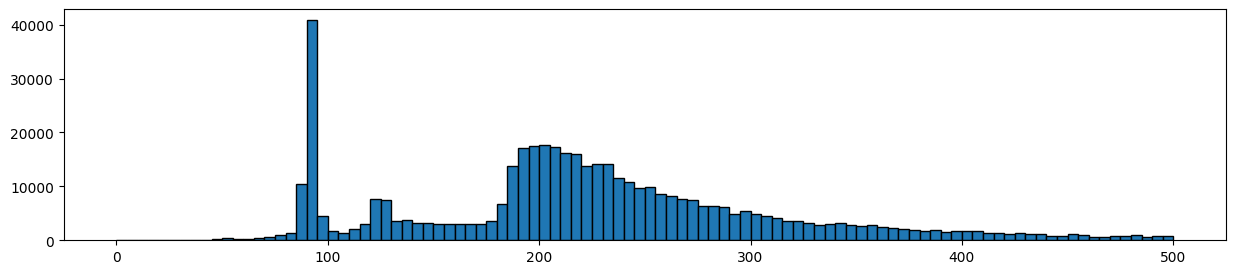

In [24]:
plt.figure(figsize=(15, 3))
plt.hist(m_values, bins=100, range=(0, 500), edgecolor='black')
plt.show()

In [37]:
data.to_csv('four_guys.csv', header=None, sep=" ", index=None)

# Generated dataset

In [47]:
gf = pd.read_csv('four_guys.csv.gen_events.csv', sep=" ", header=None, names=np.array(schemas).flatten().tolist())

In [48]:
gf.head()

,E1,p1x,p1y,p1z,E2,p2x,p2y,p2z,E3,p3x,p3y,p3z,E4,p4x,p4y,p4z
0,168.946640,-26.146681,-17.900572,-168.517288,44.520184,23.793734,35.511871,-14.870625,225.631470,-31.589621,12.933507,-226.074203,112.132919,34.576275,-31.116194,-102.719475
1,58.113720,55.715950,-13.128287,-5.856943,53.976471,32.400311,8.006641,-48.235184,162.543228,-100.347404,25.997063,126.968849,30.533628,11.842610,-21.213753,18.298880
2,34.589638,19.209719,15.598959,22.085968,22.384035,15.755951,-9.127460,19.136040,14.095910,-1.819308,-5.151577,10.917475,57.788555,-33.243950,-1.111477,52.965305
3,186.323288,63.858192,27.748949,-171.627167,23.266447,9.965894,-3.679247,17.674730,149.691193,-22.157137,-15.167491,-148.195831,53.256001,-51.302959,-9.048408,-11.826557
4,61.518017,-58.013409,-6.577831,25.543983,76.096725,-39.189770,33.112240,-57.370667,117.095024,13.256186,-44.352161,108.225327,184.796280,83.186867,17.677967,167.027298


In [49]:
e_sum_sq_g = np.power(gf['E1'] + gf['E2'] + gf['E3'] + gf['E4'], 2)
x_sum_sq_g = np.power(gf['p1x'] + gf['p2x'] + gf['p3x'] + gf['p4x'], 2)
y_sum_sq_g = np.power(gf['p1y'] + gf['p2y'] + gf['p3y'] + gf['p4y'], 2)
z_sum_sq_g = np.power(gf['p1z'] + gf['p2z'] + gf['p3z'] + gf['p4z'], 2)
m_values_g = np.sqrt(e_sum_sq_g - x_sum_sq_g - y_sum_sq_g - z_sum_sq_g)

/home/valdo/.pyenv/versions/3.11.4/envs/event_simulator/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


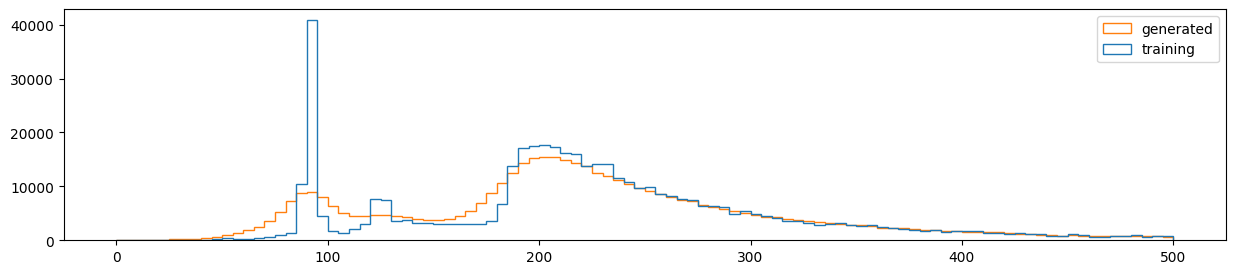

In [53]:
plt.figure(figsize=(15, 3))
plt.hist([m_values, m_values_g], bins=100, range=(0, 500), histtype='step', label=['training','generated'])
plt.legend()
plt.show()